In [49]:
!pip install tensorflow_addons

ERROR: Could not find a version that satisfies the requirement tensorflow_addons (from versions: none)
ERROR: No matching distribution found for tensorflow_addons


In [50]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import seaborn as sns
import cv2
import random
import os
import imageio
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.applications import resnet
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
from keras.applications.resnet import ResNet50

In [51]:
import zipfile
import os

# Define paths
zip_path = "archive.zip"
extract_to = "extracted_data"

# Create output directory
os.makedirs(extract_to, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction completed. Files extracted to:", extract_to)

Extraction completed. Files extracted to: extracted_data


In [52]:
import os

for root, dirs, files in os.walk(extract_to):
    for file in files:
        print(os.path.join(root, file))

extracted_data/Test cases/000230_05_01_165.png
extracted_data/Test cases/002265_01_01_016.png
extracted_data/Test cases/000230_05_01_233.png
extracted_data/Test cases/002639_05_01_141.png
extracted_data/Test cases/000021_02_01_068.png
extracted_data/Test cases/000238_09_03_124.png
extracted_data/Test cases/000223_09_02_146.png
extracted_data/Test cases/000143_04_02_126.png
extracted_data/Test cases/000058_07_01_170.png
extracted_data/Test cases/000143_05_01_120.png
extracted_data/Test cases/000198_05_01_112.png
extracted_data/Test cases/002435_04_01_230.png
extracted_data/Test cases/002276_05_03_078.png
extracted_data/Test cases/000027_05_01_099.png
extracted_data/Test cases/000266_03_02_138.png
extracted_data/Test cases/000027_03_01_095.png
extracted_data/Test cases/000230_01_01_175.png
extracted_data/Test cases/000749_03_02_108.png
extracted_data/Test cases/001574_13_01_090.png
extracted_data/Test cases/002408_01_01_161.png
extracted_data/Test cases/000188_03_01_146.png
extracted_dat

In [53]:
directory = r'/content/extracted_data/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset'

categories = ['Bengin cases', 'Malignant cases', 'Normal cases']

In [54]:
size_data = {}
for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    temp_dict = {}
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        height, width, channels = imageio.imread(filepath).shape
        if str(height) + ' x ' + str(width) in temp_dict:
            temp_dict[str(height) + ' x ' + str(width)] += 1
        else:
            temp_dict[str(height) + ' x ' + str(width)] = 1

    size_data[i] = temp_dict

size_data

/tmp/ipython-input-1417439949.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  height, width, channels = imageio.imread(filepath).shape


{'Bengin cases': {'512 x 512': 120},
 'Malignant cases': {'512 x 512': 501,
  '512 x 801': 28,
  '512 x 623': 31,
  '404 x 511': 1},
 'Normal cases': {'512 x 512': 415, '331 x 506': 1}}

Bengin cases


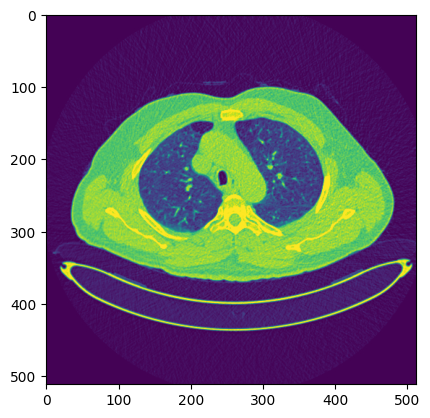

Malignant cases


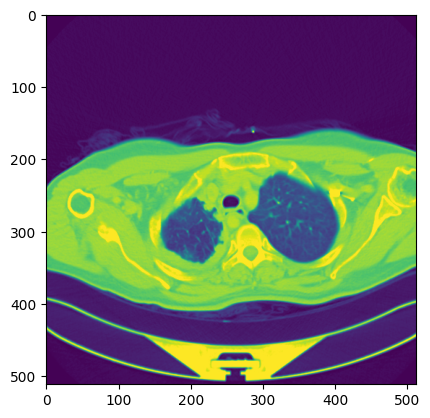

Normal cases


In [55]:
for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        print(i)
        img = cv2.imread(filepath, 0)
        plt.imshow(img)
        plt.show()
        break

Image Preprocessing and Testing

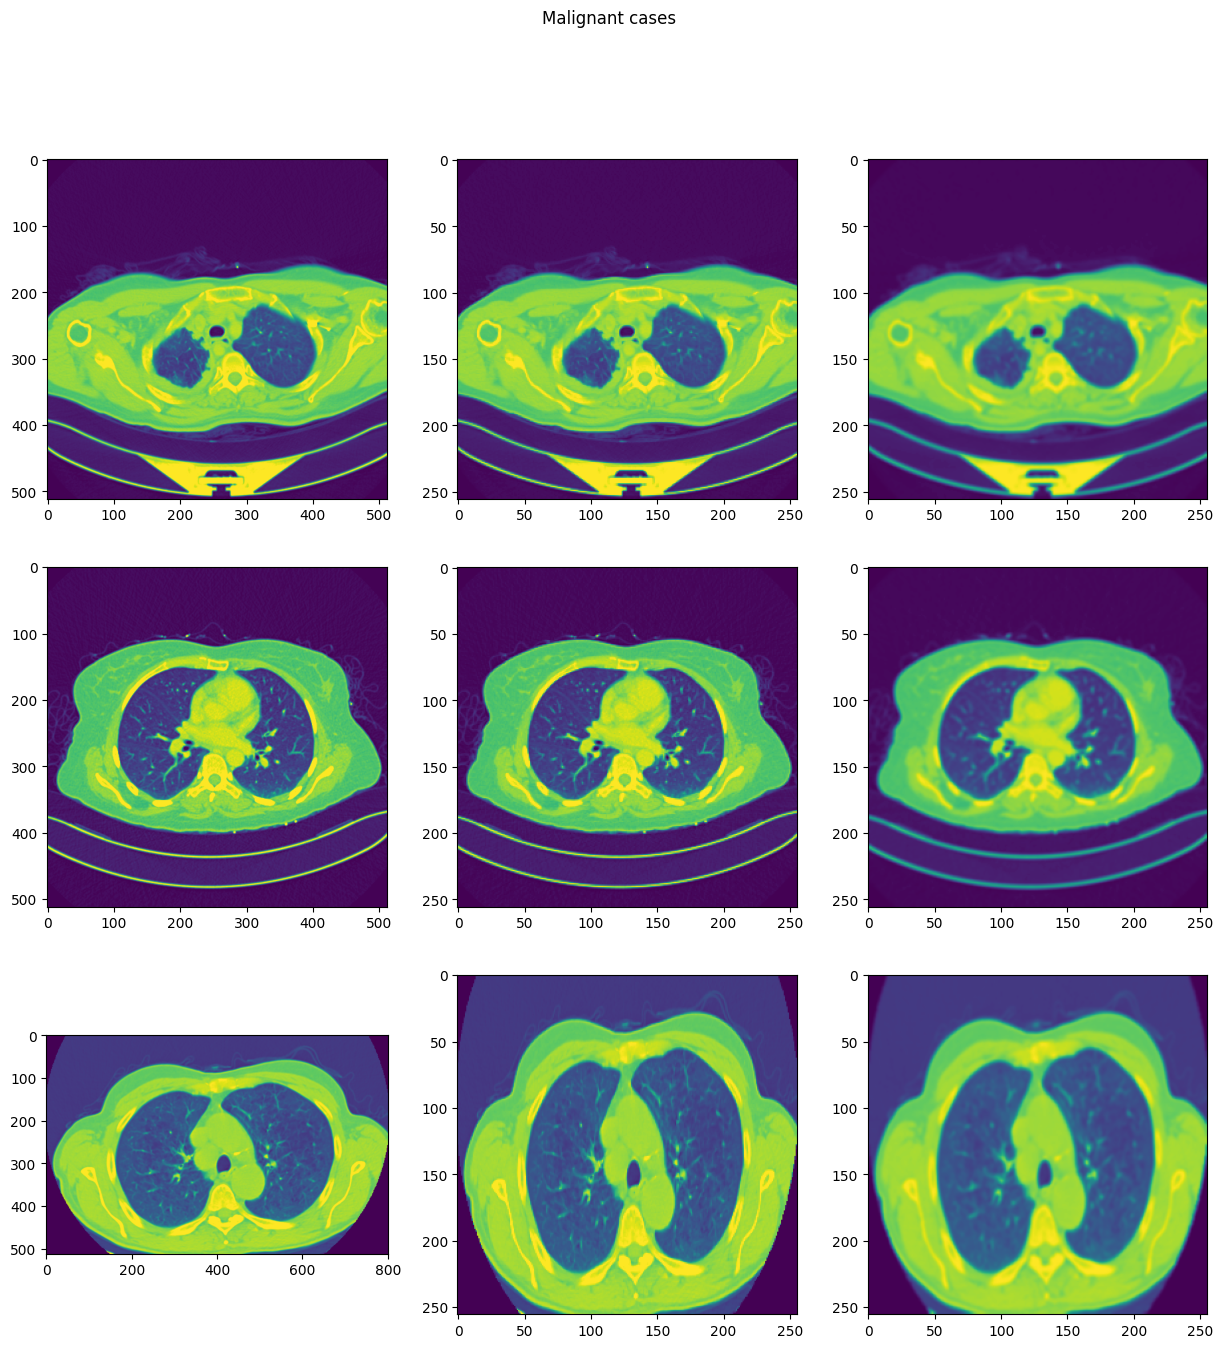

In [56]:
img_size = 256
for i in categories:
    cnt, samples = 0, 3
    fig, ax = plt.subplots(samples, 3, figsize=(15, 15))
    fig.suptitle(i)

    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for curr_cnt, file in enumerate(os.listdir(path)):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath, 0)

        img0 = cv2.resize(img, (img_size, img_size))

        img1 = cv2.GaussianBlur(img0, (5, 5), 0)

        ax[cnt, 0].imshow(img)
        ax[cnt, 1].imshow(img0)
        ax[cnt, 2].imshow(img1)
        cnt += 1
        if cnt == samples:
            break

plt.show()

Preparing Data

In [57]:
data = []
img_size = 256

for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath, 0)
        # preprocess here
        img = cv2.resize(img, (img_size, img_size))
        data.append([img, class_num])

random.shuffle(data)

X, y = [], []
for feature, label in data:
    X.append(feature)
    y.append(label)

print('X length:', len(X))
print('y counts:', Counter(y))

# normalize
X = np.array(X).reshape(-1, img_size, img_size, 1)
X = X / 255.0
y = np.array(y)

X length: 1097
y counts: Counter({1: 561, 2: 416, 0: 120})


In [58]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=10, stratify=y)

print(len(X_train), X_train.shape)
print(len(X_valid), X_valid.shape)

822 (822, 256, 256, 1)
275 (275, 256, 256, 1)


Applying SMOTE to oversample the data¶

In [59]:
print(Counter(y_train), Counter(y_valid))

Counter({np.int64(1): 420, np.int64(2): 312, np.int64(0): 90}) Counter({np.int64(1): 141, np.int64(2): 104, np.int64(0): 30})


In [60]:
print(len(X_train), X_train.shape)

X_train = X_train.reshape(X_train.shape[0], img_size*img_size*1)

print(len(X_train), X_train.shape)

822 (822, 256, 256, 1)
822 (822, 65536)


In [61]:
print('Before SMOTE:', Counter(y_train))
smote = SMOTE()
X_train_sampled, y_train_sampled = smote.fit_resample(X_train, y_train)
print('After SMOTE:', Counter(y_train_sampled))

Before SMOTE: Counter({np.int64(1): 420, np.int64(2): 312, np.int64(0): 90})
After SMOTE: Counter({np.int64(2): 420, np.int64(1): 420, np.int64(0): 420})


In [62]:
_train = X_train.reshape(X_train.shape[0], img_size, img_size, 1)
X_train_sampled = X_train_sampled.reshape(X_train_sampled.shape[0], img_size, img_size, 1)

print(len(X_train), X_train.shape)
print(len(X_train_sampled), X_train_sampled.shape)

822 (822, 65536)
1260 (1260, 256, 256, 1)


Model Building with SMOTE data

In [63]:
model1 = Sequential()

# Reshape the input data back to 4D for Conv2D layer
X_train_sampled_reshaped = X_train_sampled.reshape(X_train_sampled.shape[0], img_size, img_size, 1)
model1.add(Conv2D(64, (3, 3), input_shape=X_train_sampled_reshaped.shape[1:]))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(16))
model1.add(Dense(3, activation='softmax'))

model1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 254, 254, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 254, 254, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │     3,936,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,973,891 (15.16 MB)

 Trainable params: 3,973,891 (15.16 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
history = model1.fit(X_train_sampled, y_train_sampled, batch_size=8, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.6665 - loss: 1.1914 - val_accuracy: 0.9636 - val_loss: 0.1002
Epoch 2/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step - accuracy: 0.9878 - loss: 0.0381 - val_accuracy: 0.9964 - val_loss: 0.0128
Epoch 3/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 249s 1s/step - accuracy: 0.9919 - loss: 0.0300 - val_accuracy: 0.9891 - val_loss: 0.0432
Epoch 4/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.9952 - loss: 0.0201 - val_accuracy: 0.9927 - val_loss: 0.0129
Epoch 5/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.9923 - loss: 0.0163 - val_accuracy: 0.9964 - val_loss: 0.0181


In [66]:
y_pred = model1.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_valid, y_pred_bool))

print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))

9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      0.99      1.00       141
           2       0.99      1.00      1.00       104

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

[[ 30   0   0]
 [  0 140   1]
 [  0   0 104]]


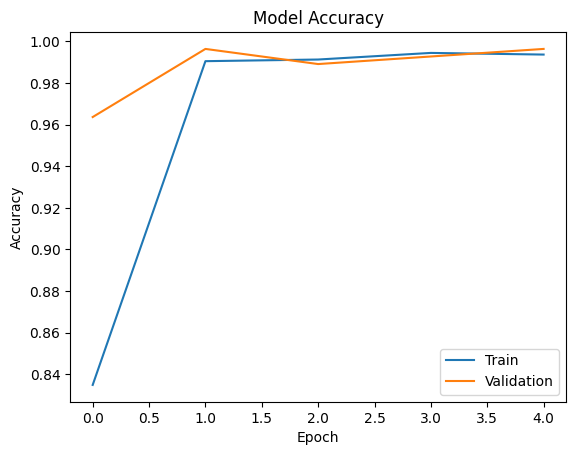

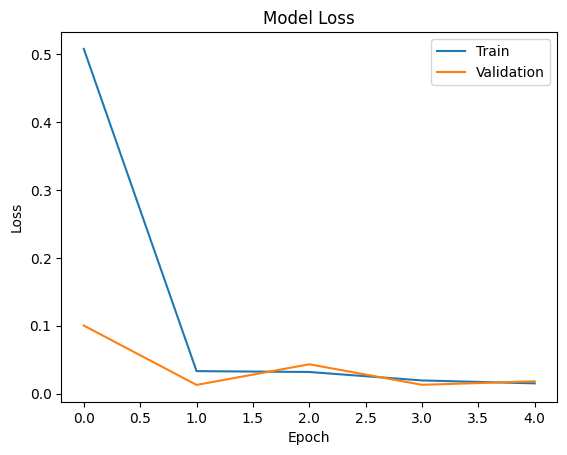

In [67]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Model Building with Class Weighted Approach

In [68]:
model2 = Sequential()

model2.add(Conv2D(64, (3, 3), input_shape=(img_size, img_size, 1)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(16))
model2.add(Dense(3, activation='softmax'))

model2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 254, 254, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 254, 254, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │     3,936,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,973,891 (15.16 MB)

 Trainable params: 3,973,891 (15.16 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
new_weights = {
    0: X_train.shape[0]/(3*Counter(y_train)[0]),
    1: X_train.shape[0]/(3*Counter(y_train)[1]),
    2: X_train.shape[0]/(3*Counter(y_train)[2]),
}
new_weights

{0: 3.0444444444444443, 1: 0.6523809523809524, 2: 0.8782051282051282}

In [71]:
# Reshape X_train back to 4D for Conv2D layer
X_train_reshaped = X_train.reshape(X_train.shape[0], img_size, img_size, 1)

history = model2.fit(X_train_reshaped, y_train, batch_size=8, epochs=5, validation_data=(X_valid, y_valid), class_weight=new_weights)

Epoch 1/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.5657 - loss: 2.4564 - val_accuracy: 0.8691 - val_loss: 0.3959
Epoch 2/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.9515 - loss: 0.1871 - val_accuracy: 0.9636 - val_loss: 0.1233
Epoch 3/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.9723 - loss: 0.1257 - val_accuracy: 0.9491 - val_loss: 0.1459
Epoch 4/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.9890 - loss: 0.0793 - val_accuracy: 0.9927 - val_loss: 0.0278
Epoch 5/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.9947 - loss: 0.0360 - val_accuracy: 1.0000 - val_loss: 0.0258


In [72]:
# Try defining, compiling, and fitting the model in a single cell
model2_rebuild = Sequential()

model2_rebuild.add(Conv2D(64, (3, 3), input_shape=(img_size, img_size, 1)))
model2_rebuild.add(Activation('relu'))
model2_rebuild.add(MaxPooling2D(pool_size=(2, 2)))

model2_rebuild.add(Conv2D(64, (3, 3), activation='relu'))
model2_rebuild.add(MaxPooling2D(pool_size=(2, 2)))

model2_rebuild.add(Flatten())
model2_rebuild.add(Dense(16))
model2_rebuild.add(Dense(3, activation='softmax'))

model2_rebuild.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reshape X_train back to 4D for Conv2D layer
X_train_reshaped = X_train.reshape(X_train.shape[0], img_size, img_size, 1)

history_rebuild = model2_rebuild.fit(X_train_reshaped, y_train, batch_size=8, epochs=5, validation_data=(X_valid, y_valid), class_weight=new_weights)

Epoch 1/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.4086 - loss: 3.0646 - val_accuracy: 0.7382 - val_loss: 0.6177
Epoch 2/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.7889 - loss: 0.5194 - val_accuracy: 0.9345 - val_loss: 0.2800
Epoch 3/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.9621 - loss: 0.1151 - val_accuracy: 0.9927 - val_loss: 0.0452
Epoch 4/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.9892 - loss: 0.0869 - val_accuracy: 0.9818 - val_loss: 0.0577
Epoch 5/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.9873 - loss: 0.1142 - val_accuracy: 0.9927 - val_loss: 0.0316


In [73]:
y_pred = model2_rebuild.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_valid, y_pred_bool))

print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))

9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.99      1.00       141
           2       0.99      0.99      0.99       104

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

[[ 30   0   0]
 [  0 140   1]
 [  1   0 103]]


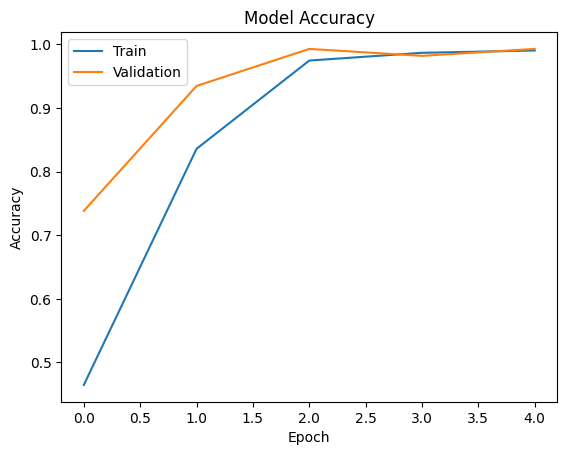

In [74]:
plt.plot(history_rebuild.history['accuracy'], label='Train')
plt.plot(history_rebuild.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history_rebuild.history['loss'], label='Train')
plt.plot(history_rebuild.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()